In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
%matplotlib inline

[0, 15, 30, 45, 60, 75, 90]
{0: 'resnet152', 15: 'mobilenet224', 30: 'densenet121', 45: 'resnet50', 60: 'vgg16', 75: 'EfficientNetB7', 90: 'EfficientNetB3'}


<Figure size 432x288 with 0 Axes>

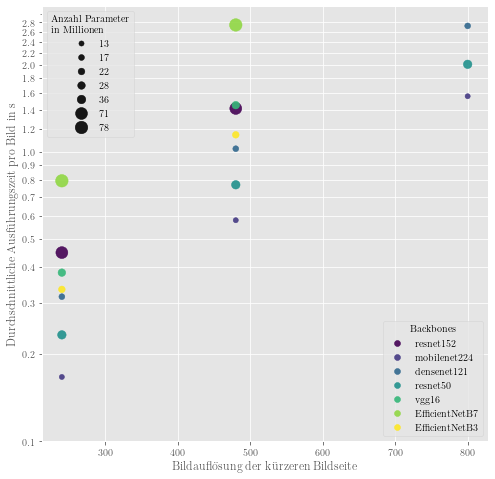

In [22]:
plt.clf()
runs = pd.read_csv('C:/Users/Yannick/Google Drive/person_detection/keras-retinanet/runtime_analysis/runtime_analysis_cpu.csv')
names = runs['backbone'].values
y = runs['inference_time'].values
area = runs['number_parameters']  # 0 to 15 point radii
x = runs['image_min_side']
color_map = dict()
colors = list()
for i, backbone in enumerate(runs['backbone'].unique()):
    color_map.update({backbone: i*15})
for backbone in runs['backbone'].values:
    colors.append(color_map[backbone])

fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(x, y, s=area/500000, c=colors, alpha=0.9)
ax.set_ylabel('Durchschnittliche Ausführungszeit pro Bild in s')
ax.set_xlabel('Bildauflösung der kürzeren Bildseite')
# for i, txt in enumerate(names):
#     ax.annotate(txt, (x[i], y[i]))
color_map_inv = {value: key for key, value in color_map.items()}
# produce a legend with the unique colors from the scatter
handles, labels = scatter.legend_elements(prop="colors", alpha=0.9)
labels = [int(label.replace("'",'').replace("$", '')) for label in labels]
print(labels)
print(color_map_inv)
legend1 = ax.legend(handles, [color_map_inv[label] for label in labels], loc="lower right", title="Backbones")
ax.add_artist(legend1)
# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.9)
labels = [int(float(label.replace("'",'').replace("$", '')) * 500000 / 1e6) for label in labels]
legend2 = ax.legend(handles, labels, loc="upper left", title="Anzahl Parameter\nin Millionen")
ax.set_yscale('log')
ax.set_yticks(np.concatenate([np.arange(0.1, 1, 0.1), np.arange(1.0, 3.0, 0.2)]))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.savefig('C:/Users/Yannick/OneDrive/Dokumente/Studium/Masterarbeit/Ausarbeitung/98_images/runtime_analysis_cpu.pgf')

[0, 50, 100, 150, 200, 250, 300]
{0: 'densenet121', 50: 'resnet50', 100: 'resnet152', 150: 'mobilenet224', 200: 'EfficientNetB7', 250: 'EfficientNetB3', 300: 'vgg19'}


<Figure size 432x288 with 0 Axes>

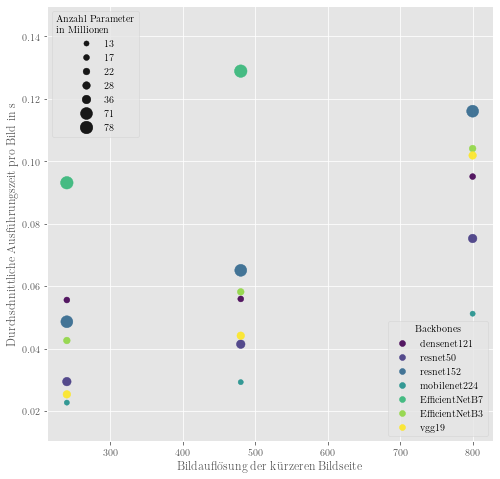

In [8]:
plt.clf()
runs = pd.read_csv('C:/Users/Yannick/Google Drive/person_detection/keras-retinanet/runtime_analysis/runtime_analysis_gpu_p100.csv')
names = runs['backbone'].values
y = runs['inference_time'].values
area = runs['number_parameters']  # 0 to 15 point radii
x = runs['image_min_side']
color_map = dict()
colors = list()
for i, backbone in enumerate(runs['backbone'].unique()):
    color_map.update({backbone: i*50})
for backbone in runs['backbone'].values:
    colors.append(color_map[backbone])

fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.scatter(x, y, s=area/500000, c=colors, alpha=0.9)
ax.set_ylabel('Durchschnittliche Ausführungszeit pro Bild in s')
ax.set_xlabel('Bildauflösung der kürzeren Bildseite')
# for i, txt in enumerate(names):
#     ax.annotate(txt, (x[i], y[i]))
color_map_inv = {value: key for key, value in color_map.items()}
# produce a legend with the unique colors from the scatter
handles, labels = scatter.legend_elements(prop="colors", alpha=0.9)
labels = [int(label.replace("'",'').replace("$", '')) for label in labels]
print(labels)
print(color_map_inv)
legend1 = ax.legend(handles, [color_map_inv[label] for label in labels], loc="lower right", title="Backbones")
ax.add_artist(legend1)
# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.9)
labels = [int(float(label.replace("'",'').replace("$", '')) * 500000 / 1e6) for label in labels]
legend2 = ax.legend(handles, labels, loc="upper left", title="Anzahl Parameter\nin Millionen")

plt.savefig('C:/Users/Yannick/OneDrive/Dokumente/Studium/Masterarbeit/Ausarbeitung/98_images/runtime_analysis_gpu.pgf')